# Data Preprocessing
Titanic - by [Saniewski](https://github.com/Saniewski)

In [145]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [128]:
titanic = pd.read_csv('./data/train.csv')

In [129]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [130]:
df = titanic.copy()

In [131]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Simple columns and values preprocessing

Drop rows with missing `Embarked` values.

In [132]:
print(df.shape[0])
df.dropna(subset='Embarked', inplace=True)
print(df.shape[0])

891
889


One-hot encode `Pclass` (passenger's socio-economic class), `Sex`, and `Embarked` columns.

In [133]:
dummies_pclass = pd.get_dummies(df['Pclass'], drop_first=True).rename(columns={2: "2nd_class", 3: "3rd_class"})
dummies_sex = pd.get_dummies(df['Sex'], drop_first=True)
dummies_embarked = pd.get_dummies(df['Embarked'], drop_first=True).rename(columns={'Q': 'Queenstown', 'S': 'Southampton'})
df = pd.concat([df, dummies_pclass, dummies_sex, dummies_embarked], axis=1)
df.drop(columns=['Pclass', 'Sex', 'Embarked'], inplace=True)
df

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,2nd_class,3rd_class,male,Queenstown,Southampton
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,1,0,1,0,1
887,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,0,0,0,0,1
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,0,1,0,0,1
889,890,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,0,0,1,0,0


Convert `Cabin` column values to indicate whether a passenger's cabin is known after the disaster. A lot of this data is missing, might try to make use of what we have.

In [134]:
df['Cabin'] = df['Cabin'].apply(lambda x: 0 if x is np.nan else 1)
df

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,2nd_class,3rd_class,male,Queenstown,Southampton
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,0,1,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,0,1,0,1,0,1
887,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,1,0,0,0,0,1
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,0,0,1,0,0,1
889,890,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,1,0,0,1,0,0


Remove `Ticket` column - not sure if it can be transformed in any useful way...

In [135]:
df.drop(columns=['Ticket'], inplace=True)
df

,PassengerId,Survived,Name,Age,SibSp,Parch,Fare,Cabin,2nd_class,3rd_class,male,Queenstown,Southampton
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,0,0,1,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,1,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,1,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,8.0500,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27.0,0,0,13.0000,0,1,0,1,0,1
887,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,30.0000,1,0,0,0,0,1
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,23.4500,0,0,1,0,0,1
889,890,1,"Behr, Mr. Karl Howell",26.0,0,0,30.0000,1,0,0,1,0,0


Convert `Name` column to `Title` - this might be of use later...

In [136]:
df['Title'] = df['Name'].apply(lambda x: x[str.index(x, ', ')+2:str.index(x, '. ')+1])
df.drop(columns=['Name'], inplace=True)
df

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin,2nd_class,3rd_class,male,Queenstown,Southampton,Title
0,1,0,22.0,1,0,7.2500,0,0,1,1,0,1,Mr.
1,2,1,38.0,1,0,71.2833,1,0,0,0,0,0,Mrs.
2,3,1,26.0,0,0,7.9250,0,0,1,0,0,1,Miss.
3,4,1,35.0,1,0,53.1000,1,0,0,0,0,1,Mrs.
4,5,0,35.0,0,0,8.0500,0,0,1,1,0,1,Mr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.0,0,0,13.0000,0,1,0,1,0,1,Rev.
887,888,1,19.0,0,0,30.0000,1,0,0,0,0,1,Miss.
888,889,0,NaN,1,2,23.4500,0,0,1,0,0,1,Miss.
889,890,1,26.0,0,0,30.0000,1,0,0,1,0,0,Mr.


One-hot encode `Title` column.

In [137]:
dummies_title = pd.get_dummies(df['Title'], drop_first=True)
df = pd.concat([df, dummies_title], axis=1)
df.drop(columns=['Title'], inplace=True)
df

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin,2nd_class,3rd_class,male,...,Master.,Miss.,Mlle.,Mme.,Mr.,Mrs.,Ms.,Rev.,Sir.,the Countess.
0,1,0,22.0,1,0,7.2500,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
1,2,1,38.0,1,0,71.2833,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,4,1,35.0,1,0,53.1000,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,0,35.0,0,0,8.0500,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.0,0,0,13.0000,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
887,888,1,19.0,0,0,30.0000,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
888,889,0,NaN,1,2,23.4500,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
889,890,1,26.0,0,0,30.0000,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


Save the processed dataframe without rows with missing `Age` as `train_no_imputation.csv`.

In [199]:
df.dropna().to_csv('./data/train_not_imputed.csv', index=False)

## Imputation

Filling the missing `Age` values.

In [140]:
df.isnull().sum()

PassengerId        0
Survived           0
Age              177
SibSp              0
Parch              0
Fare               0
Cabin              0
2nd_class          0
3rd_class          0
male               0
Queenstown         0
Southampton        0
Col.               0
Don.               0
Dr.                0
Jonkheer.          0
Lady.              0
Major.             0
Master.            0
Miss.              0
Mlle.              0
Mme.               0
Mr.                0
Mrs.               0
Ms.                0
Rev.               0
Sir.               0
the Countess.      0
dtype: int64

In [141]:
missing_age_count = df['Age'].isnull().sum()
print(f'Missing "Age" data: {str(round(missing_age_count / df.shape[0] * 100, 2))}% ({missing_age_count}/{df.shape[0]})')

Missing "Age" data: 19.91% (177/889)


### Imputation with median
Fill all missing `Age` values with the <b>median</b> of the column.

In [142]:
median_imputer = SimpleImputer(strategy='median')
median_imputer.fit(df)
df_median_imputed = pd.DataFrame(median_imputer.transform(df), columns=df.columns)

In [143]:
df_median_imputed

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin,2nd_class,3rd_class,male,...,Master.,Miss.,Mlle.,Mme.,Mr.,Mrs.,Ms.,Rev.,Sir.,the Countess.
0,1.0,0.0,22.0,1.0,0.0,7.2500,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2.0,1.0,38.0,1.0,0.0,71.2833,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3.0,1.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,1.0,35.0,1.0,0.0,53.1000,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5.0,0.0,35.0,0.0,0.0,8.0500,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,887.0,0.0,27.0,0.0,0.0,13.0000,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
885,888.0,1.0,19.0,0.0,0.0,30.0000,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
886,889.0,0.0,28.0,1.0,2.0,23.4500,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
887,890.0,1.0,26.0,0.0,0.0,30.0000,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [144]:
df_median_imputed.to_csv('./data/train_median_imputed.csv', index=False)

### Imputation based on Pclass
Age is somewhat correlated to the passenger's socio-economic class (lower class passengers tend to be younger than upper class).

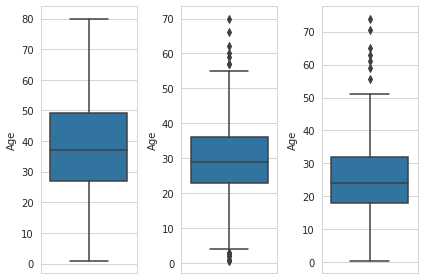

In [192]:
fig, axes = plt.subplots(1, 3)
sns.boxplot(y='Age', data=df[(df['2nd_class']==0) & (df['3rd_class']==0)], ax=axes[0])
sns.boxplot(y='Age', data=df[df['2nd_class']==1], ax=axes[1])
sns.boxplot(y='Age', data=df[df['3rd_class']==1], ax=axes[2])
plt.tight_layout()

In [193]:
mean_age_of_1st_class = int(np.floor(df[(df['2nd_class']==0) & (df['3rd_class']==0)]['Age'].mean()))
mean_age_of_2nd_class = int(np.floor(df[df['2nd_class']==1]['Age'].mean()))
mean_age_of_3rd_class = int(np.floor(df[df['3rd_class']==1]['Age'].mean()))
print(f"Mean age of 1st class passengers: {mean_age_of_1st_class}")
print(f"Mean age of 2nd class passengers: {mean_age_of_2nd_class}")
print(f"Mean age of 3rd class passengers: {mean_age_of_3rd_class}")

Mean age of 1st class passengers: 38
Mean age of 2nd class passengers: 29
Mean age of 3rd class passengers: 25


In [194]:
def impute_age(cols):
  Age = cols[0]
  is_2nd_class = cols[1]
  is_3rd_class = cols[2]
  if pd.isnull(Age):
    if is_2nd_class == 1:
      return mean_age_of_2nd_class
    elif is_3rd_class == 1:
      return mean_age_of_3rd_class
    else:
      return mean_age_of_1st_class
  else:
    return Age

In [195]:
df_pclass_imputed = df.copy()
df_pclass_imputed['Age'] = df_pclass_imputed[['Age', '2nd_class', '3rd_class']].apply(impute_age, axis=1)

In [197]:
df_pclass_imputed

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin,2nd_class,3rd_class,male,...,Master.,Miss.,Mlle.,Mme.,Mr.,Mrs.,Ms.,Rev.,Sir.,the Countess.
0,1,0,22.0,1,0,7.2500,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
1,2,1,38.0,1,0,71.2833,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,4,1,35.0,1,0,53.1000,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,0,35.0,0,0,8.0500,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.0,0,0,13.0000,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
887,888,1,19.0,0,0,30.0000,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
888,889,0,25.0,1,2,23.4500,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
889,890,1,26.0,0,0,30.0000,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [198]:
df_pclass_imputed.to_csv('./data/train_pclass_imputed.csv', index=False)